<a href="https://colab.research.google.com/github/aciofo/AI-Engineering/blob/main/machine-learning-fundamentals/clustering/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
plt.rcParams['figure.figsize'] = (16, 10)
sns.set_theme()

In [27]:
from sklearn.datasets import make_blobs

In [28]:
random_seed = 2 # put 2 to have clusters with a specific meaning

In [29]:
x, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    random_state=random_seed)

In [30]:
x-=x.min(axis=0)
x.max(axis=0)

array([ 4.76595442, 10.40987684])

In [31]:
x[:,0]*=20
x[:,1]*=6

In [32]:
x.max(axis=0)

array([95.31908842, 62.45926106])

<Axes: >

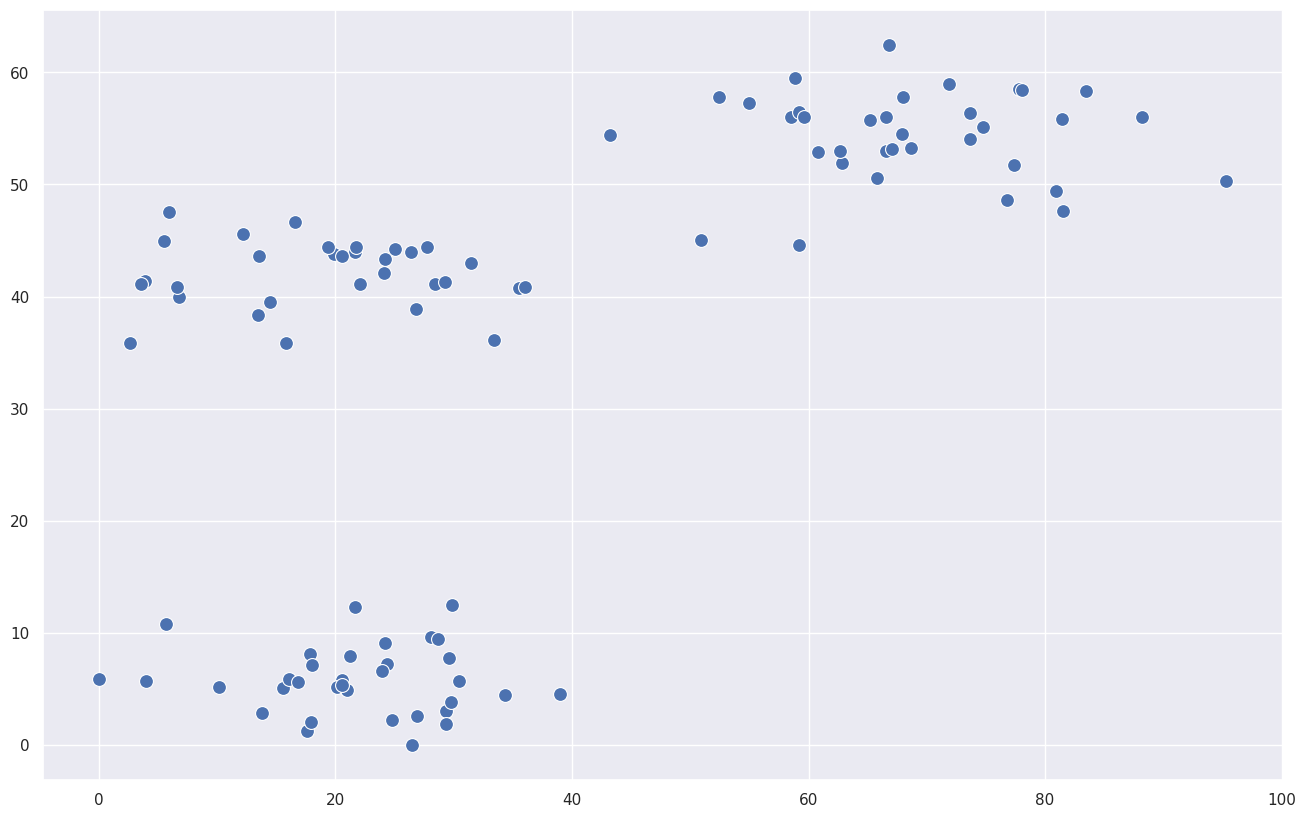

In [33]:
sns.scatterplot(x=x[:,0], y=x[:,1], s=100)

## Create model

In [34]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=random_seed) # kmeans++ is used to improve the initialization of centroids

In [36]:
kmeans.fit(x)

KMeans(n_clusters=3, random_state=2)

## Evaluate model

In [37]:
kmeans.cluster_centers_

array([[21.6946738 ,  5.79701926],
       [68.58085741, 54.30041256],
       [19.17731736, 42.01327356]])

In [38]:
from scipy.spatial.distance import cdist

In [39]:
a = np.array([[1, 2], [3,2]])
b = np.array([[2, 1], [3,3]])

cdist(a, b, 'euclidean')

array([[1.41421356, 2.23606798],
       [1.41421356, 1.        ]])

In [40]:
distorsion = sum(np.square(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)))/x.shape[0]

In [41]:
distorsion

np.float64(107.41040694974288)

In [42]:
inertia = sum(np.square(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)))

In [43]:
inertia

np.float64(10741.040694974288)

In [44]:
kmeans.inertia_

10741.04069497429

## Visualize clusters

In [45]:
y_means = kmeans.predict(x)
y_means

array([2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 1,
       1, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1,
       1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0], dtype=int32)

Text(0, 0.5, 'Spent on diapers')

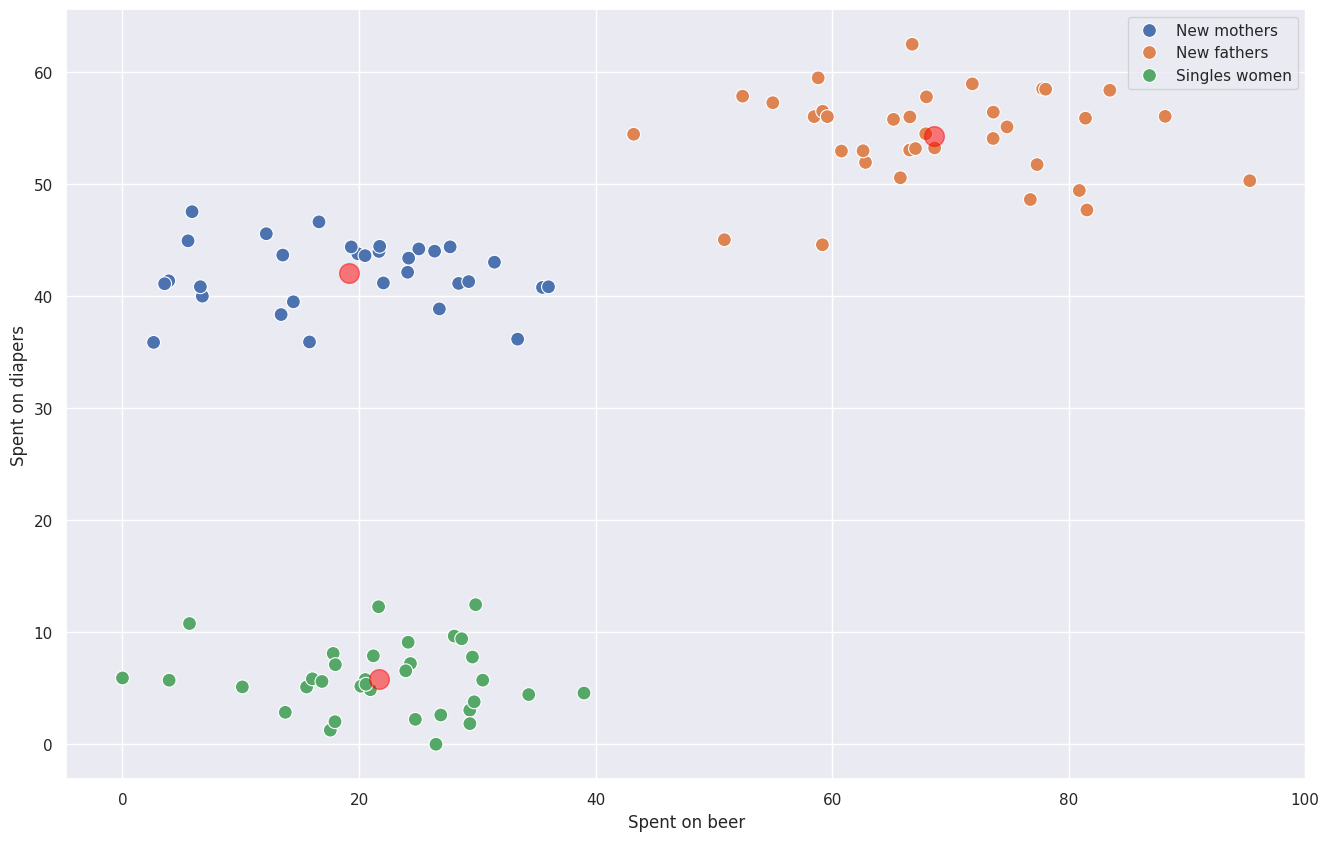

In [46]:
cluster_map = {0: "Singles women", 1: "New fathers", 2: "New mothers"}
vfunc = np.vectorize(lambda x: cluster_map[x])

classes = vfunc(y_means)

sns.scatterplot(x=x[:,0], y=x[:,1], hue=classes, s=100)

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)

plt.xlabel('Spent on beer')
plt.ylabel('Spent on diapers')

# Elbow method

In [47]:
ssd = {}

for k in range(1, 10):
  kmeans = KMeans(
      n_clusters=k,
      init='k-means++'
  ).fit(x)

  ssd[k] = kmeans.inertia_

ssd

{1: 106907.67527213428,
 2: 32112.174288799488,
 3: 10741.04069497429,
 4: 9258.63851375604,
 5: 5707.015400474258,
 6: 5070.5165559150455,
 7: 3986.389762918099,
 8: 3181.304160295222,
 9: 2897.0867373577544}

Text(0, 0.5, 'SSD')

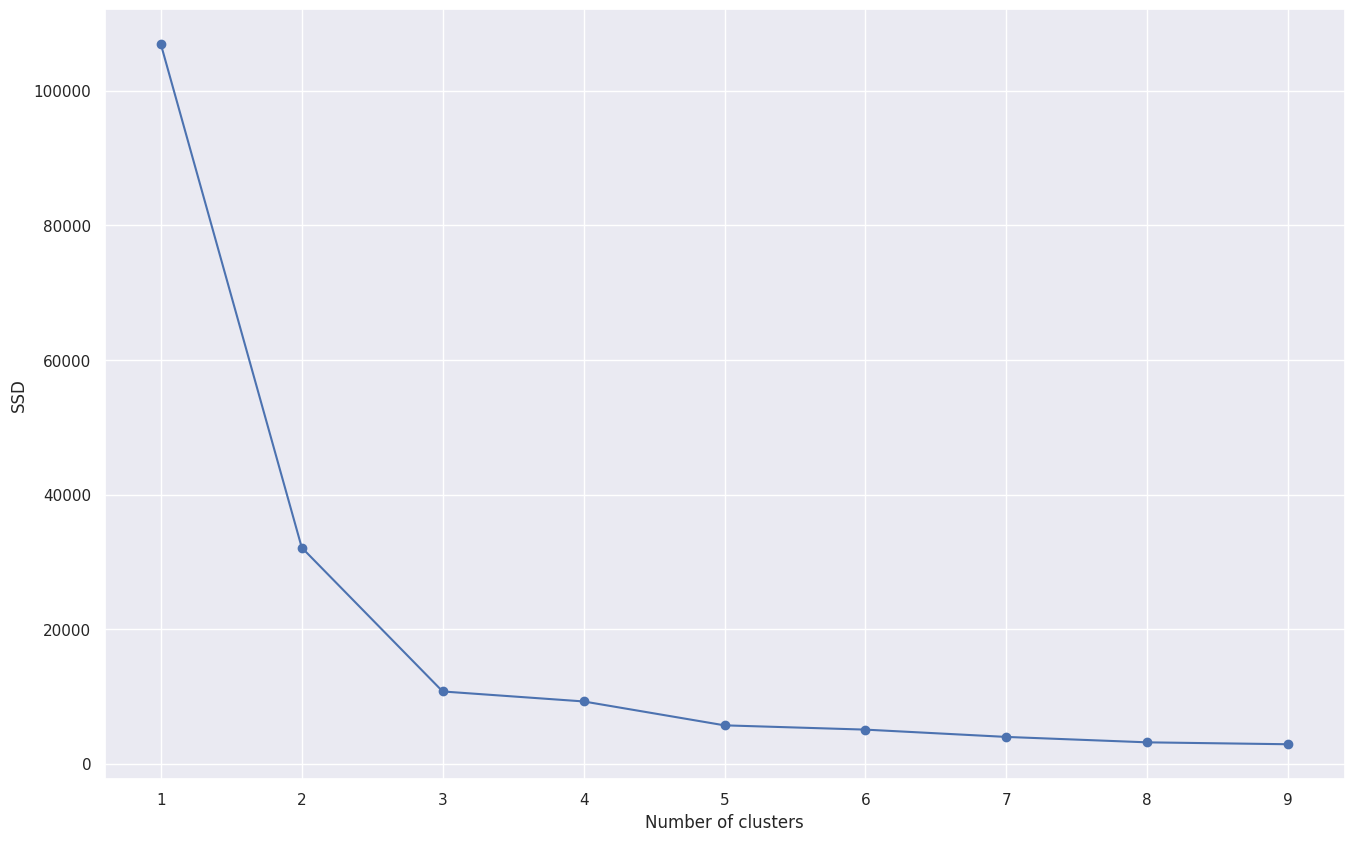

In [48]:
plt.plot(list(ssd.keys()), list(ssd.values()), marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel('SSD')